<a href="https://colab.research.google.com/github/Suannecy-young/mobile-game-ab-testing/blob/main/Cookie_Cats_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
file_path = 'cookie_cats.xlsx'

df = pd.read_excel(file_path)

df.to_csv('cookie_cats.csv', index=False)

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
df.iloc[:, :20]

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<Axes: >

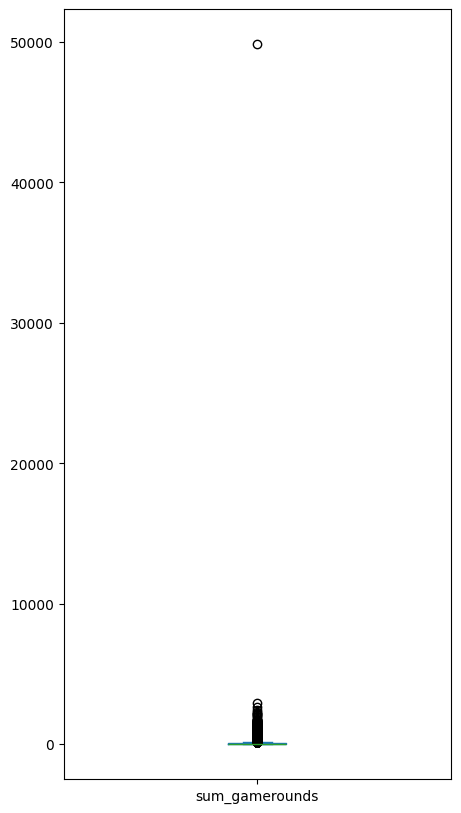

In [ ]:
df['sum_gamerounds'].plot.box(figsize=(5,10))

In [ ]:
# Remove rows where sum_gamerounds is greater than 40000
df = df[df['sum_gamerounds'] <= 40000]

In [ ]:
# Counting the number of players for each number of gamerounds
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

Text(0.5, 0, '# Game rounds')

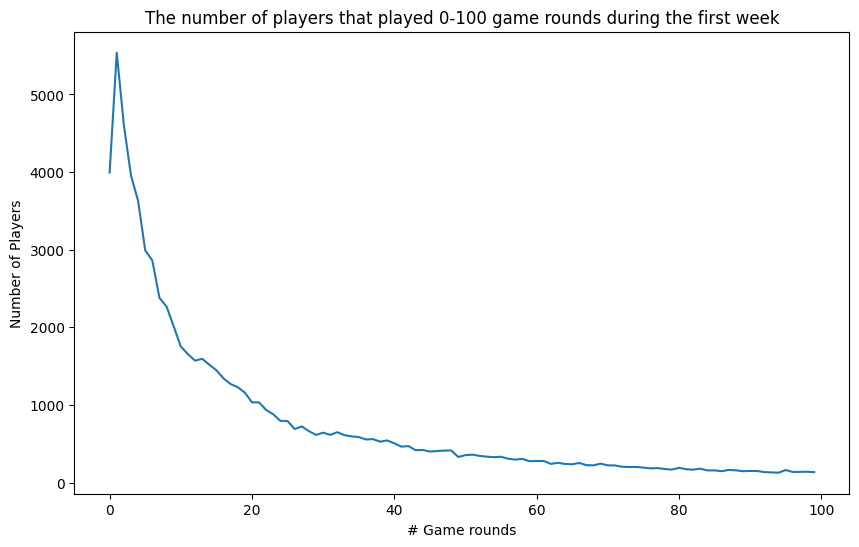

In [ ]:
# Plot the distribution of players that played 0 to 100 game rounds during their first week playing the game.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

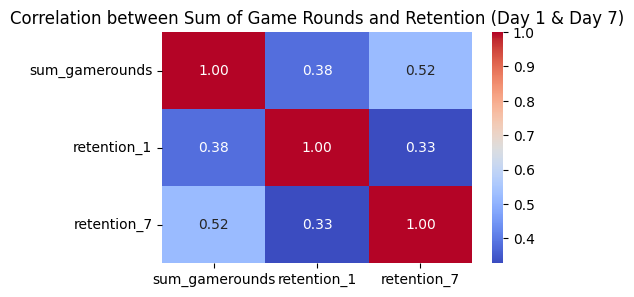

In [ ]:
correlation_matrix = df[['sum_gamerounds', 'retention_1', 'retention_7']].corr()

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sum of Game Rounds and Retention (Day 1 & Day 7)')
plt.show()

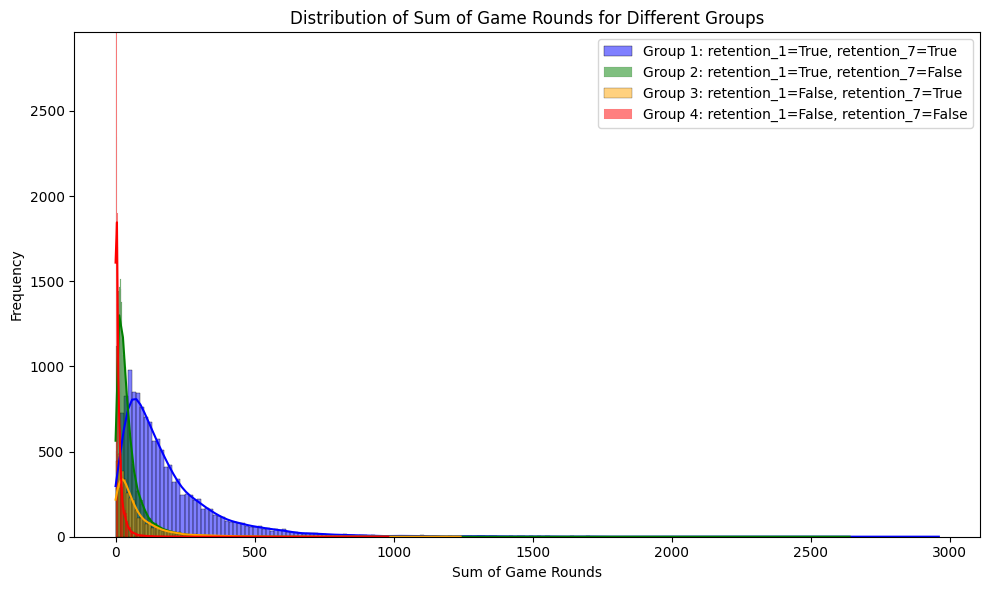

In [ ]:
# Group: divide into four groups based on retention_1 and retention_7
group_1 = df[(df['retention_1'] == True) & (df['retention_7'] == True)]
group_2 = df[(df['retention_1'] == True) & (df['retention_7'] == False)]
group_3 = df[(df['retention_1'] == False) & (df['retention_7'] == True)]
group_4 = df[(df['retention_1'] == False) & (df['retention_7'] == False)]

# Calculate the minimum and maximum of sum_gamerounds for all groups
ymin = min(group_1['sum_gamerounds'].min(), group_2['sum_gamerounds'].min(),
           group_3['sum_gamerounds'].min(), group_4['sum_gamerounds'].min())
ymax = max(group_1['sum_gamerounds'].max(), group_2['sum_gamerounds'].max(),
           group_3['sum_gamerounds'].max(), group_4['sum_gamerounds'].max())

plt.figure(figsize=(10, 6))

sns.histplot(group_1['sum_gamerounds'], kde=True, color='blue', label='Group 1: retention_1=True, retention_7=True')
sns.histplot(group_2['sum_gamerounds'], kde=True, color='green', label='Group 2: retention_1=True, retention_7=False')
sns.histplot(group_3['sum_gamerounds'], kde=True, color='orange', label='Group 3: retention_1=False, retention_7=True')
sns.histplot(group_4['sum_gamerounds'], kde=True, color='red', label='Group 4: retention_1=False, retention_7=False')

plt.title('Distribution of Sum of Game Rounds for Different Groups')
plt.xlabel('Sum of Game Rounds')
plt.ylabel('Frequency')

plt.ylim(ymin, ymax)

plt.legend()

plt.tight_layout()
plt.show()

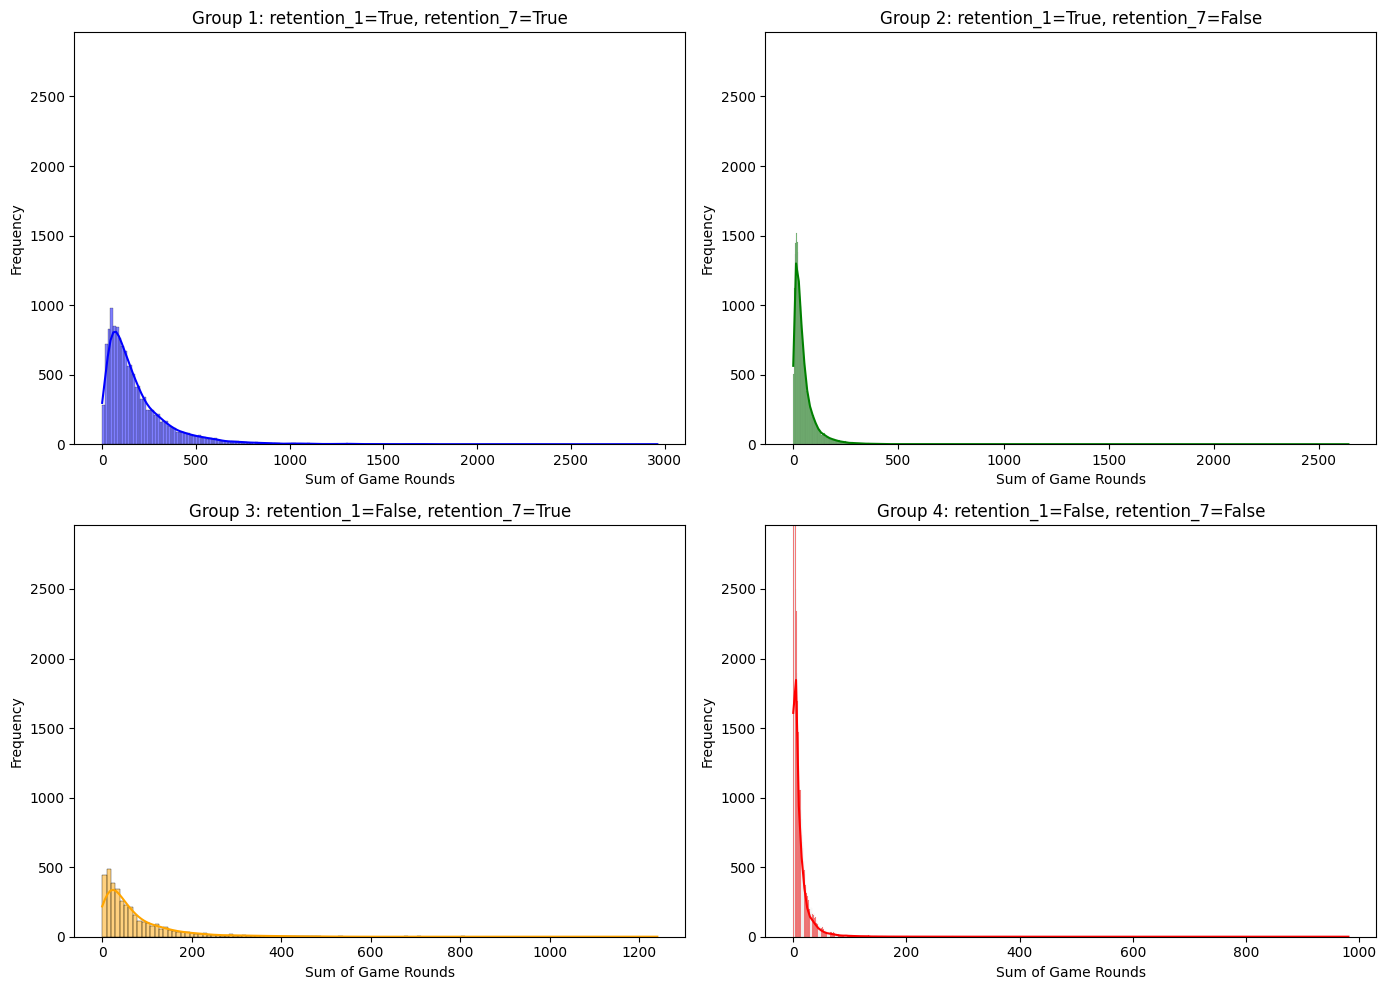

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(group_1['sum_gamerounds'], ax=axs[0, 0], kde=True, color='blue')
axs[0, 0].set_title('Group 1: retention_1=True, retention_7=True')
axs[0, 0].set_xlabel('Sum of Game Rounds')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_ylim(ymin, ymax)

sns.histplot(group_2['sum_gamerounds'], ax=axs[0, 1], kde=True, color='green')
axs[0, 1].set_title('Group 2: retention_1=True, retention_7=False')
axs[0, 1].set_xlabel('Sum of Game Rounds')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_ylim(ymin, ymax)

sns.histplot(group_3['sum_gamerounds'], ax=axs[1, 0], kde=True, color='orange')
axs[1, 0].set_title('Group 3: retention_1=False, retention_7=True')
axs[1, 0].set_xlabel('Sum of Game Rounds')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_ylim(ymin, ymax)

sns.histplot(group_4['sum_gamerounds'], ax=axs[1, 1], kde=True, color='red')
axs[1, 1].set_title('Group 4: retention_1=False, retention_7=False')
axs[1, 1].set_xlabel('Sum of Game Rounds')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()

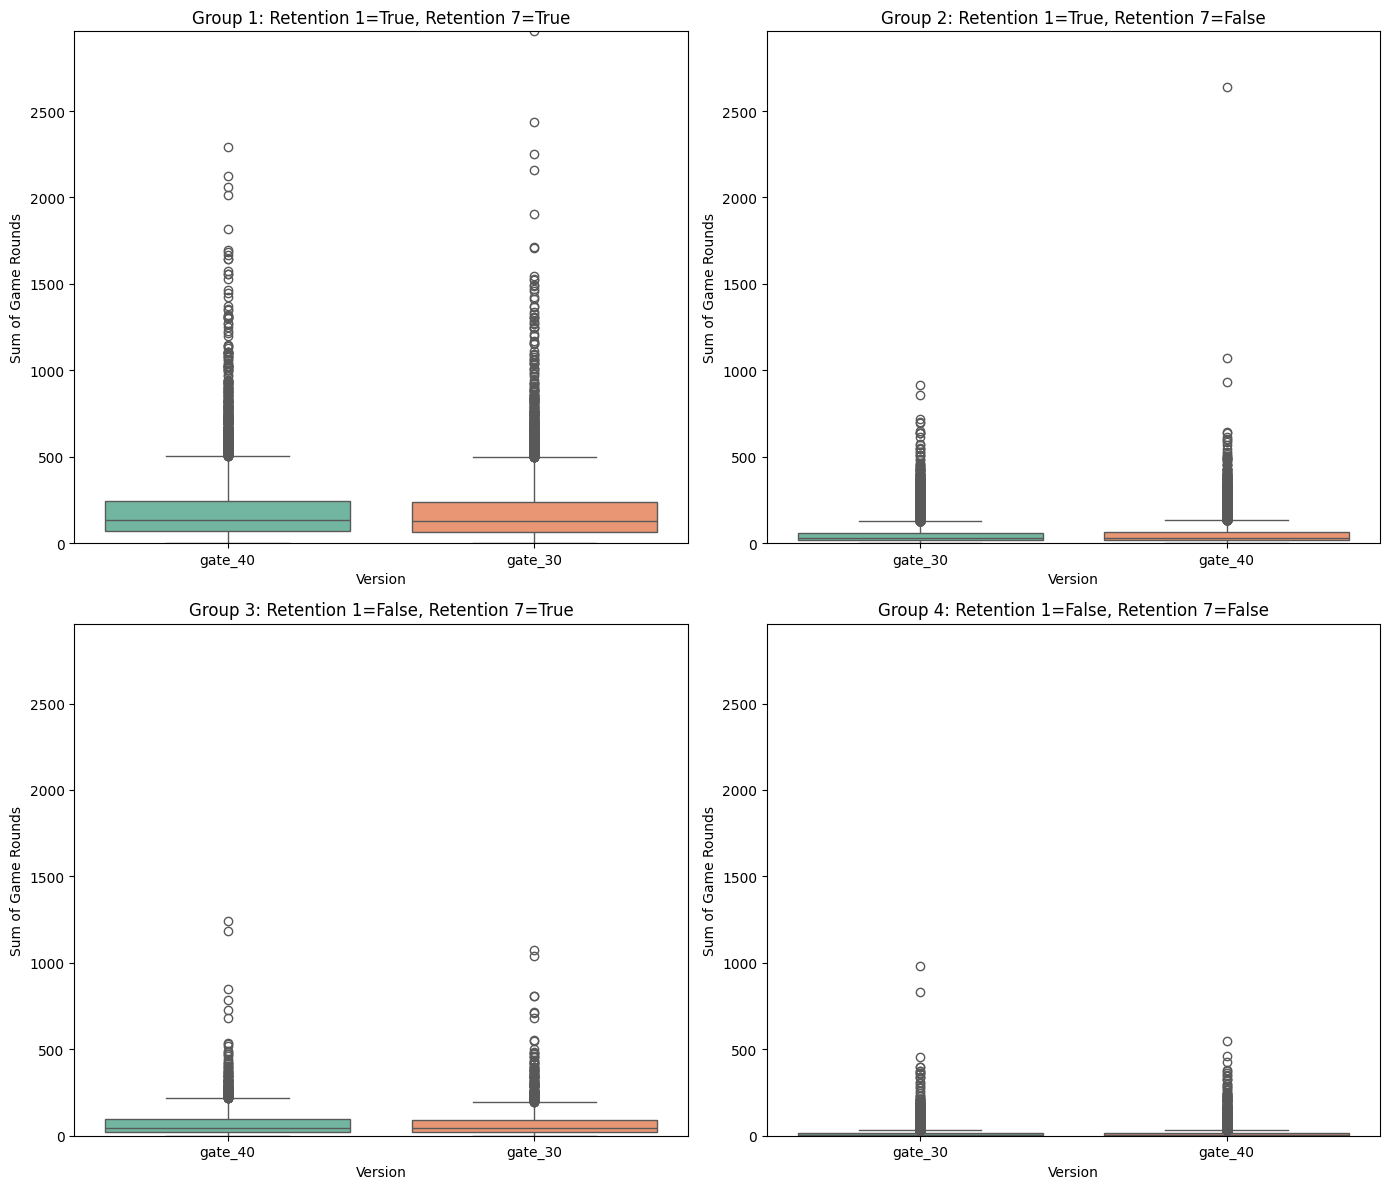

In [ ]:
ymin = min(group_1['sum_gamerounds'].min(), group_2['sum_gamerounds'].min(),
           group_3['sum_gamerounds'].min(), group_4['sum_gamerounds'].min())
ymax = max(group_1['sum_gamerounds'].max(), group_2['sum_gamerounds'].max(),
           group_3['sum_gamerounds'].max(), group_4['sum_gamerounds'].max())

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

sns.boxplot(x='version', y='sum_gamerounds', data=group_1, hue='version', palette='Set2', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Group 1: Retention 1=True, Retention 7=True')
axs[0, 0].set_xlabel('Version')
axs[0, 0].set_ylabel('Sum of Game Rounds')
axs[0, 0].set_ylim(ymin, ymax)

sns.boxplot(x='version', y='sum_gamerounds', data=group_2, hue='version', palette='Set2', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Group 2: Retention 1=True, Retention 7=False')
axs[0, 1].set_xlabel('Version')
axs[0, 1].set_ylabel('Sum of Game Rounds')
axs[0, 1].set_ylim(ymin, ymax)

sns.boxplot(x='version', y='sum_gamerounds', data=group_3, hue='version', palette='Set2', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Group 3: Retention 1=False, Retention 7=True')
axs[1, 0].set_xlabel('Version')
axs[1, 0].set_ylabel('Sum of Game Rounds')
axs[1, 0].set_ylim(ymin, ymax)

sns.boxplot(x='version', y='sum_gamerounds', data=group_4, hue='version', palette='Set2', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Group 4: Retention 1=False, Retention 7=False')
axs[1, 1].set_xlabel('Version')
axs[1, 1].set_ylabel('Sum of Game Rounds')
axs[1, 1].set_ylim(ymin, ymax)

plt.tight_layout()
plt.show()

In [ ]:
df['retention_1'].sum() / df['retention_1'].count()

df.groupby('version')['retention_1'].mean()

df.sample(frac = 1, replace = True)
df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()


version
gate_30    0.446172
gate_40    0.445221
Name: retention_1, dtype: float64

<Axes: ylabel='Density'>

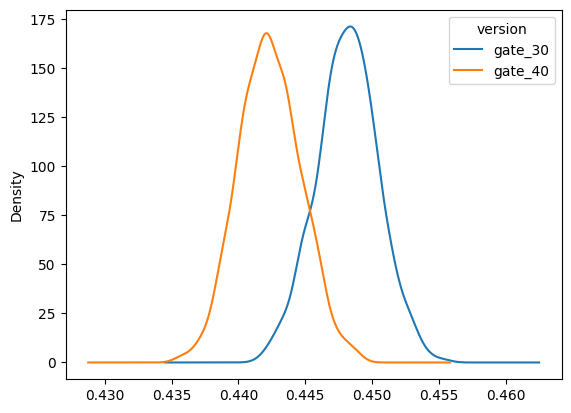

In [ ]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Probability that 1-day retention is greater when the gate is at level 30: 0.965


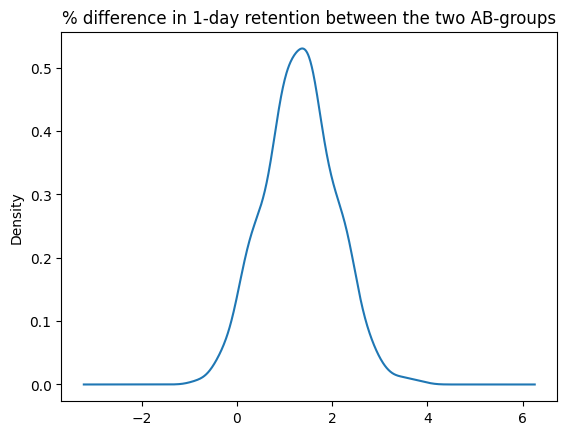

In [ ]:
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

print('Probability that 1-day retention is greater when the gate is at level 30:', (boot_1d['diff'] > 0).mean())

Probability that 7-day retention is greater when the gate is at level 30: 1.0


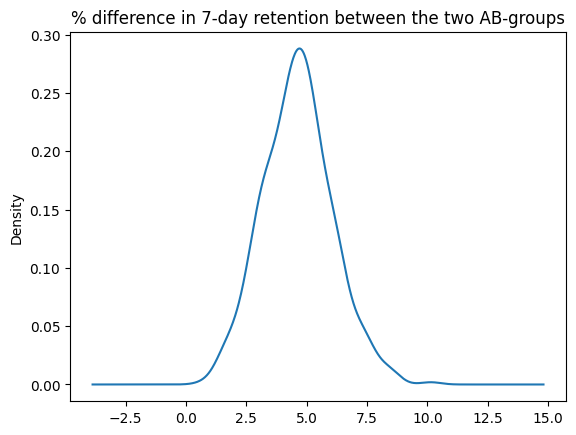

In [ ]:
df.groupby('version')['retention_7'].mean()
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d_df = pd.DataFrame(boot_7d)

boot_7d_df['diff'] = (boot_7d_df['gate_30'] - boot_7d_df['gate_40']) / boot_7d_df['gate_40'] * 100

ax = boot_7d_df['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')


probability = (boot_7d_df['diff'] > 0).mean()
print('Probability that 7-day retention is greater when the gate is at level 30:', probability)


In [ ]:
import numpy as np
import scipy.stats as stats

group_gate_30_1 = df[df['version'] == 'gate_30']['retention_1'].astype(float)
group_gate_40_1 = df[df['version'] == 'gate_40']['retention_1'].astype(float)

# Calculate sample means and standard deviations
mean_gate_30_1 = group_gate_30_1.mean()
mean_gate_40_1 = group_gate_40_1.mean()
std_gate_30_1 = group_gate_30_1.std()
std_gate_40_1 = group_gate_40_1.std()

n_gate_30_1 = len(group_gate_30_1)
n_gate_40_1 = len(group_gate_40_1)

# z-test
z_stat_1 = (mean_gate_30_1 - mean_gate_40_1) / np.sqrt((std_gate_30_1**2 / n_gate_30_1) + (std_gate_40_1**2 / n_gate_40_1))
p_value_z_1 = 2 * (1 - stats.norm.cdf(np.abs(z_stat_1)))
print(f"z-statistic (1-day retention): {z_stat_1}")
print(f"z-test p-value (1-day retention): {p_value_z_1}")

probability_z_1 = 1 - p_value_z_1 / 2
print(f"Probability that 1-day retention is greater when the gate is at level 30 (z-test): {probability_z_1}")

z-statistic (1-day retention): 1.787094804723698
z-test p-value (1-day retention): 0.07392216704545396
Probability that 1-day retention is greater when the gate is at level 30 (z-test): 0.963038916477273


In [ ]:
import numpy as np
import scipy.stats as stats

# Extract data for each group and ensure the data type is float
group_gate_30_7 = df[df['version'] == 'gate_30']['retention_7'].astype(float)
group_gate_40_7 = df[df['version'] == 'gate_40']['retention_7'].astype(float)

# Calculate sample mean and standard deviation
mean_gate_30_7 = group_gate_30_7.mean()
mean_gate_40_7 = group_gate_40_7.mean()
std_gate_30_7 = group_gate_30_7.std()
std_gate_40_7 = group_gate_40_7.std()

# Sample size
n_gate_30_7 = len(group_gate_30_7)
n_gate_40_7 = len(group_gate_40_7)

# z-test
z_stat_7 = (mean_gate_30_7 - mean_gate_40_7) / np.sqrt((std_gate_30_7**2 / n_gate_30_7) + (std_gate_40_7**2 / n_gate_40_7))
p_value_z_7 = 2 * (1 - stats.norm.cdf(np.abs(z_stat_7)))
print(f"z-statistic (7-day retention): {z_stat_7}")
print(f"z-test p-value (7-day retention): {p_value_z_7}")

# Calculate the probability for 7-day retention
probability_z_7 = 1 - p_value_z_7 / 2
print(f"Probability that 7-day retention is greater when the gate is at level 30 (z-test): {probability_z_7}")

z-statistic (7-day retention): 3.1570804843272744
z-test p-value (7-day retention): 0.001593573551195382
Probability that 7-day retention is greater when the gate is at level 30 (z-test): 0.9992032132244023


In [ ]:
from statsmodels.stats.weightstats import ztest

# Perform a Z-test using ztest
z_stat_1, p_value_z_1 = ztest(group_gate_30_1, group_gate_40_1)
print(f"z-statistic (1-day retention): {z_stat_1}")
print(f"z-test p-value (1-day retention): {p_value_z_1}")

probability_z_1 = 1 - p_value_z_1 / 2
print(f"Probability that 1-day retention is greater when the gate is at level 30 (z-test): {probability_z_1}")

z-statistic (1-day retention): 1.7871153372992439
z-test p-value (1-day retention): 0.0739188490890383
Probability that 1-day retention is greater when the gate is at level 30 (z-test): 0.9630405754554808


In [ ]:
from statsmodels.stats.weightstats import ztest

# Perform a Z-test using ztest
z_stat_7, p_value_z_7 = ztest(group_gate_30_7, group_gate_40_7)
print(f"z-statistic (7-day retention): {z_stat_7}")
print(f"z-test p-value (7-day retention): {p_value_z_7}")

probability_z_7 = 1 - p_value_z_7 / 2
print(f"Probability that 7-day retention is greater when the gate is at level 30 (z-test): {probability_z_7}")

z-statistic (7-day retention): 3.1575495965685936
z-test p-value (7-day retention): 0.001591011696061818
Probability that 7-day retention is greater when the gate is at level 30 (z-test): 0.9992044941519691
